<a href="https://colab.research.google.com/github/yanos84/Cnn_tutorial/blob/main/Self_augmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import kagglehub

path = kagglehub.dataset_download("ankit1743/skyview-an-aerial-landscape-dataset")

print("Path to dataset files:", path)

100%|██████████| 154M/154M [00:02<00:00, 62.2MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/ankit1743/skyview-an-aerial-landscape-dataset/versions/1


In [ ]:
!ls /root/.cache/kagglehub/datasets/ankit1743/skyview-an-aerial-landscape-dataset/versions/1
!cp -r /root/.cache/kagglehub/datasets/ankit1743/skyview-an-aerial-landscape-dataset/versions/1 /content/skyview-dataset


Aerial_Landscapes


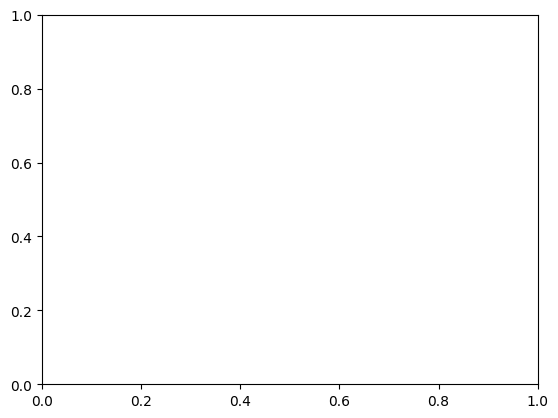

In [ ]:
#  ____________________ANIMATION_________________________________________________

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation


# Fonction pour mettre à jour le graphique à chaque frame
def update(frame):
    # Supprimer le contenu actuel du graphique
    plt.clf()

    # Générer des données pour le graphique (à remplacer par vos propres données)
    x = np.linspace(0, 2 * np.pi, 100)
    y = np.sin(x + frame / 10.0)

    # Tracer le graphique
    plt.plot(x, y, label='Données en mouvement')
    plt.title('Graphique animé')
    plt.xlabel('X-axis')
    plt.ylabel('Y-axis')
    plt.legend()


# Initialiser le graphique
fig, ax = plt.subplots()

# Créer l'animation
animation = FuncAnimation(fig, update, frames=range(100), interval=100)

# Afficher le graphique animé
plt.show()


In [ ]:
# __________________________FILTRES____________________________________

import cv2
import numpy as np


def apply_blurred_filter(image):
    # Implémentation du filtre flou (blurred)
    return cv2.GaussianBlur(image, (15, 15), 0)

def apply_contoured_filter(image):
    # Implémentation du filtre contour (contoured)
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    _, thresh = cv2.threshold(gray, 128, 255, cv2.THRESH_BINARY)
    contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    cv2.drawContours(image, contours, -1, (0, 255, 0), 3)
    return image

def apply_greyed_filter(image):
    # Implémentation du filtre en niveaux de gris (greyed)
    return cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

def apply_busted_filter(image):
    # Appliquer un effet "busted" en modifiant les canaux de couleurs
    image[:, :, 0] = cv2.bitwise_not(image[:, :, 0])  # Inverser le canal bleu
    return image

    # Conversion de l'image en HSV




def apply_masked_filter(image):
    # Appliquer un masque sur l'image
    # Définir les limites de la couleur verte en HSV
    lower_green = np.array([30, 20, 20])
    upper_green = np.array([90, 255, 255])
    blurred_image = cv2.GaussianBlur(image, (15, 15), 0)
    hsv = cv2.cvtColor(blurred_image, cv2.COLOR_BGR2HSV)

    mask = cv2.inRange(hsv, lower_green, upper_green)
    masked_image = cv2.bitwise_and(image, image, mask=mask)
    return masked_image

def apply_morphed_filter(image):
    # Appliquer une transformation morphologique
    kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (5, 5))
    morphed_image = cv2.morphologyEx(image, cv2.MORPH_GRADIENT, kernel)
    return morphed_image
def apply_flip_filter(image):
    # Appliquer le filtre de retournement (flip)
    return cv2.flip(image, 1)

import os
import numpy as np

# Dictionnaire des filtres avec leur fonction correspondante
filters = {
    "blurred": apply_blurred_filter,
    "contoured": apply_contoured_filter,
    "greyed": apply_greyed_filter,
    "busted": apply_busted_filter,
    "masked": apply_masked_filter,
    "morphed": apply_morphed_filter,
    "fliped": apply_flip_filter,
}

input_folder = "/content/skyview-dataset/Aerial_Landscapes/Agriculture"
output_folder = "/content/Output"

def apply_all_operations(image, filename, output_folder):
    # Appliquer chaque filtre
    for filter_name, apply_filter in filters.items():
        filtered_image = apply_filter(image.copy())  # Appliquer le filtre
        filter_output_folder = os.path.join(output_folder, filter_name)
        os.makedirs(filter_output_folder, exist_ok=True)
        output_filename = f"{filter_name}_{filename}"
        output_path = os.path.join(filter_output_folder, output_filename)
        cv2.imwrite(output_path, filtered_image)
 # Appliquer le zoom
    zoom_factor = 1.5
    zoomed_image = cv2.resize(image, None, fx=zoom_factor, fy=zoom_factor)
    output_zoom_folder = os.path.join(output_folder, "zoom")
    os.makedirs(output_zoom_folder, exist_ok=True)
    output_zoom_path = os.path.join(output_zoom_folder, f"zoom_{filename}")
    cv2.imwrite(output_zoom_path, zoomed_image)

    # Appliquer la rotation
    for degrees in [10, 20, 30, 40]:
        (h, w) = image.shape[:2]
        center = (w // 2, h // 2)
        matrix = cv2.getRotationMatrix2D(center, degrees, 1.0)
        rotated_image = cv2.warpAffine(image, matrix, (w, h), flags=cv2.INTER_LINEAR, borderMode=cv2.BORDER_REFLECT)
        output_rotate_folder = os.path.join(output_folder, "rotated")
        os.makedirs(output_rotate_folder, exist_ok=True)
        output_rotate_path = os.path.join(output_rotate_folder, f"rotated_{filename}_{degrees}.jpg")
        cv2.imwrite(output_rotate_path, rotated_image)

In [ ]:
#________________________SPLIT_________________________________________

import os
import shutil
from sklearn.model_selection import train_test_split

def split_data(output_folder, splited_folder, train_ratio=0.7, val_ratio=0.15, test_ratio=0.15):
    """
    Divise les données en ensembles d'entraînement, de validation et de test.

    Parameters:
        - input_folder (str): Chemin du dossier contenant les données à diviser.
        - splited_folder (str): Chemin où seront sauvegardés les dossiers `train`, `val` et `test`.
        - train_ratio (float): Proportion des données pour l'entraînement.
        - val_ratio (float): Proportion des données pour la validation.
        - test_ratio (float): Proportion des données pour les tests.
    """
    # Vérifier que la somme des ratios est égale à 1
    if train_ratio + val_ratio + test_ratio != 1.0:
        raise ValueError("Les ratios train_ratio, val_ratio et test_ratio doivent totaliser 1.0.")

    # Créer les sous-dossiers `train`, `val`, `test` dans `splited_folder`
    for split in ['train', 'val', 'test']:
        split_folder = os.path.join(splited_folder, split)
        os.makedirs(split_folder, exist_ok=True)

    # Parcourir les sous-dossiers de `input_folder`
    for class_name in os.listdir(output_folder):
        class_path = os.path.join(output_folder, class_name)

        # Vérifier si c'est un dossier
        if os.path.isdir(class_path):
            files = [os.path.join(class_path, f) for f in os.listdir(class_path) if os.path.isfile(os.path.join(class_path, f))]

            # Diviser les fichiers entre train, validation, et test
            train_files, temp_files = train_test_split(files, test_size=(1 - train_ratio), random_state=42)
            val_files, test_files = train_test_split(temp_files, test_size=(test_ratio / (test_ratio + val_ratio)), random_state=42)

            # Copier les fichiers dans les sous-dossiers correspondants
            for split, split_files in zip(['train', 'val', 'test'], [train_files, val_files, test_files]):
                split_class_folder = os.path.join(splited_folder, split, class_name)
                os.makedirs(split_class_folder, exist_ok=True)

                for file in split_files:
                    shutil.copy(file, split_class_folder)

    print(f"Les données ont été divisées et sauvegardées dans : {splited_folder}")


In [ ]:
# _____________________MAIN____________________________________________________


import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras.utils import plot_model
from tensorflow.keras.models import Sequential, Model, load_model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.optimizers import SGD



import os
import cv2

import numpy as np

# Dictionnaire des filtres avec leur fonction correspondante
filters = {
    "blurred": apply_blurred_filter,
    "contoured": apply_contoured_filter,
    "greyed": apply_greyed_filter,
    "busted": apply_busted_filter,
    "masked": apply_masked_filter,
    "morphed": apply_morphed_filter,
    "fliped": apply_flip_filter,
}

input_folder = "/media/yanos/Last_disk/My_vs_projects/Chettih/dataset/1/Aerial_Landscapes/Agriculture"
output_folder = "/media/yanos/Last_disk/My_vs_projects/Chettih/dataset/output"

def apply_all_operations(image, filename, output_folder):
    # Appliquer chaque filtre
    for filter_name, apply_filter in filters.items():
        filtered_image = apply_filter(image.copy())  # Appliquer le filtre
        filter_output_folder = os.path.join(output_folder, filter_name)
        os.makedirs(filter_output_folder, exist_ok=True)
        output_filename = f"{filter_name}_{filename}"
        output_path = os.path.join(filter_output_folder, output_filename)
        cv2.imwrite(output_path, filtered_image)
 # Appliquer le zoom
    zoom_factor = 1.5
    zoomed_image = cv2.resize(image, None, fx=zoom_factor, fy=zoom_factor)
    output_zoom_folder = os.path.join(output_folder, "zoom")
    os.makedirs(output_zoom_folder, exist_ok=True)
    output_zoom_path = os.path.join(output_zoom_folder, f"zoom_{filename}")
    cv2.imwrite(output_zoom_path, zoomed_image)

    # Appliquer la rotation
    for degrees in [10, 20, 30, 40]:
        (h, w) = image.shape[:2]
        center = (w // 2, h // 2)
        matrix = cv2.getRotationMatrix2D(center, degrees, 1.0)
        rotated_image = cv2.warpAffine(image, matrix, (w, h), flags=cv2.INTER_LINEAR, borderMode=cv2.BORDER_REFLECT)
        output_rotate_folder = os.path.join(output_folder, "rotated")
        os.makedirs(output_rotate_folder, exist_ok=True)
        output_rotate_path = os.path.join(output_rotate_folder, f"rotated_{filename}_{degrees}.jpg")
        cv2.imwrite(output_rotate_path, rotated_image)











"""
def main():
    input_folder = "/content/skyview-dataset/Aerial_Landscapes/Agriculture"
    output_folder = "/content/Output"
    splited_folder = "/content/split"

    train_data_dir = '/content/split/train'
    validation_data_dir = '/content/split/val'
    test_data_dir = '/content/split/test'
    cnn_model_path = '/content/code/model2/cnn_model.h5'
    transfer_model_path = '/content/code/model2/transfer_model.h5'

    # 🔹 Étape 1 : Augmentation des images
    print("🔄 Augmentation des images...")
    for filename in os.listdir(input_folder):
        image_path = os.path.join(input_folder, filename)
        image = cv2.imread(image_path)
        if image is None:
            continue
        image = cv2.resize(image, (150, 150))
        apply_all_operations(image, filename, output_folder)
    print("✅ Augmentation terminée.")

    # Étape 2 : Division des données en ensembles d'entraînement, validation et test
    print("Division des données en ensembles train, val, test...")
    split_data(output_folder, splited_folder, train_ratio=0.7, val_ratio=0.15, test_ratio=0.15)
    print(f"Données divisées et sauvegardées dans : {splited_folder}")

    input_shape = (150, 150, 3)
    batch_size = 64
    epochs = 20
    num_classes = 9

    # 🔹 Étape 3 : Entraînement du modèle CNN
    print("🔄 Entraînement du modèle CNN...")
    cnn_model = train_model(train_data_dir, validation_data_dir, input_shape, batch_size, epochs, num_classes, cnn_model_path)
    if cnn_model:
        print("✅ Modèle CNN entraîné et sauvegardé.")

        # 🔹 Étape 4 : Entraînement du modèle Transfer Learning
        print("🔄 Entraînement du modèle Transfer Learning...")
        transfer_model = train_transfer_model(train_data_dir, validation_data_dir, input_shape, batch_size, epochs, num_classes, cnn_model_path)
        if transfer_model:
            transfer_model.save(transfer_model_path, save_format='h5')
            print("✅ Modèle Transfer Learning entraîné et sauvegardé.")

if __name__ == "__main__":
    main()
"""

'\ndef main():\n    input_folder = "/content/skyview-dataset/Aerial_Landscapes/Agriculture"\n    output_folder = "/content/Output"\n    splited_folder = "/content/split"\n\n    train_data_dir = \'/content/split/train\'\n    validation_data_dir = \'/content/split/val\'\n    test_data_dir = \'/content/split/test\'\n    cnn_model_path = \'/content/code/model2/cnn_model.h5\'\n    transfer_model_path = \'/content/code/model2/transfer_model.h5\'\n\n    # 🔹 Étape 1 : Augmentation des images\n    print("🔄 Augmentation des images...")\n    for filename in os.listdir(input_folder):\n        image_path = os.path.join(input_folder, filename)\n        image = cv2.imread(image_path)\n        if image is None:\n            continue\n        image = cv2.resize(image, (150, 150))\n        apply_all_operations(image, filename, output_folder)\n    print("✅ Augmentation terminée.")\n\n    # Étape 2 : Division des données en ensembles d\'entraînement, validation et test\n    print("Division des données en 

In [ ]:
#-----------Augmentation des Images

input_folder = "/content/skyview-dataset/Aerial_Landscapes/Agriculture"
output_folder = "/content/Output"
splited_folder = "/content/split"

train_data_dir = '/content/split/train'
validation_data_dir = '/content/split/val'
test_data_dir = '/content/split/test'
cnn_model_path = '/content/code/model2/cnn_model.h5'
transfer_model_path = '/content/code/model2/transfer_model.h5'

    # 🔹 Étape 1 : Augmentation des images
print("🔄 Augmentation des images...")
for filename in os.listdir(input_folder):
  image_path = os.path.join(input_folder, filename)
  image = cv2.imread(image_path)
  if image is None:
    continue
  image = cv2.resize(image, (250, 250))
  apply_all_operations(image, filename, output_folder)
  print("✅ Augmentation terminée.")

🔄 Augmentation des images...
✅ Augmentation terminée.
✅ Augmentation terminée.
✅ Augmentation terminée.
✅ Augmentation terminée.
✅ Augmentation terminée.
✅ Augmentation terminée.
✅ Augmentation terminée.
✅ Augmentation terminée.
✅ Augmentation terminée.
✅ Augmentation terminée.
✅ Augmentation terminée.
✅ Augmentation terminée.
✅ Augmentation terminée.
✅ Augmentation terminée.
✅ Augmentation terminée.
✅ Augmentation terminée.
✅ Augmentation terminée.
✅ Augmentation terminée.
✅ Augmentation terminée.
✅ Augmentation terminée.
✅ Augmentation terminée.
✅ Augmentation terminée.
✅ Augmentation terminée.
✅ Augmentation terminée.
✅ Augmentation terminée.
✅ Augmentation terminée.
✅ Augmentation terminée.
✅ Augmentation terminée.
✅ Augmentation terminée.
✅ Augmentation terminée.
✅ Augmentation terminée.
✅ Augmentation terminée.
✅ Augmentation terminée.
✅ Augmentation terminée.
✅ Augmentation terminée.
✅ Augmentation terminée.
✅ Augmentation terminée.
✅ Augmentation terminée.
✅ Augmentation termin

In [ ]:
    # Étape 2 : Division des données en ensembles d'entraînement, validation et test

def data_div():
  print("Division des données en ensembles train, val, test...")
  split_data(output_folder, splited_folder, train_ratio=0.7, val_ratio=0.15, test_ratio=0.15)
  print(f"Données divisées et sauvegardées dans : {splited_folder}")
"""
  input_shape = (150, 150, 3)
  batch_size = 64
  epochs = 20
  num_classes = 9
"""

'\n  input_shape = (150, 150, 3)\n  batch_size = 64\n  epochs = 20\n  num_classes = 9\n'

In [ ]:
from tensorflow.keras.metrics import Precision, Recall

def create_cnn_model(input_shape, num_classes):
    model = Sequential([
        Conv2D(32, (3, 3), activation='relu', input_shape=input_shape),
        MaxPooling2D((2, 2)),
        Conv2D(64, (3, 3), activation='relu'),
        MaxPooling2D((2, 2)),
        Conv2D(128, (3, 3), activation='relu'),
        MaxPooling2D((2, 2)),
        Flatten(),
        Dense(512, activation='relu'),
        Dense(num_classes, activation='softmax')
    ])
    model.compile(optimizer=SGD(learning_rate=0.01), loss='categorical_crossentropy',
                  metrics=[
                      'accuracy',
                      Precision(name='precision_blurred', class_id=0),
                      Precision(name='precision_busted', class_id=1),
                      Precision(name='precision_countoured', class_id=2),
                      Precision(name='precision_fliped', class_id=3),
                      Precision(name='precision_greyed', class_id=4),
                      Precision(name='precision_masked', class_id=5),
                      Precision(name='precision_morphed', class_id=6),
                      Precision(name='precision_rotated', class_id=7),
                      Precision(name='precision_zoomed', class_id=8),
                      Recall(name='recall_blurred', class_id=0),
                      Recall(name='recall_busted', class_id=1),
                      Recall(name='recall_countoured', class_id=2),
                      Recall(name='recall_fliped', class_id=3),
                      Recall(name='recall_greyed', class_id=4),
                      Recall(name='recall_masked', class_id=5),
                      Recall(name='recall_morphed', class_id=6),
                      Recall(name='recall_rotated', class_id=7),
                      Recall(name='recall_zoomed', class_id=8),
                      ])
    return model

In [ ]:
def create_transfer_model(input_shape, num_classes, base_model):
    for layer in base_model.layers:
        layer.trainable = False  # On gèle les couches du modèle pré-entraîné

    x = base_model.output
    x = Flatten()(x)
    x = Dense(512, activation='relu')(x)
    x = Dropout(0.4)(x)
    output_layer = Dense(num_classes, activation='softmax')(x)

    model = Model(inputs=base_model.input, outputs=output_layer)
    model.compile(optimizer=SGD(learning_rate=0.00001), loss='categorical_crossentropy', metrics=['accuracy'])
    return model

In [ ]:
def train_model(train_data_dir, validation_data_dir, input_shape, batch_size, epochs, num_classes, save_model_path):
    train_datagen = ImageDataGenerator(rescale=1.0/255)
    train_generator = train_datagen.flow_from_directory(
        train_data_dir, target_size=(input_shape[0], input_shape[1]),
        batch_size=batch_size, class_mode='categorical'
    )

    validation_datagen = ImageDataGenerator(rescale=1.0/255)
    validation_generator = validation_datagen.flow_from_directory(
        validation_data_dir, target_size=(input_shape[0], input_shape[1]),
        batch_size=batch_size, class_mode='categorical'
    )

    if train_generator.samples == 0 or validation_generator.samples == 0:
        print("❌ Erreur : Le dataset est vide. Vérifiez les dossiers de train et validation.")
        return None

    model = create_cnn_model(input_shape, num_classes)

    history = model.fit(
        train_generator,
        steps_per_epoch=max(1, train_generator.samples // batch_size),
        epochs=epochs,
        validation_data=validation_generator,
        validation_steps=max(1, validation_generator.samples // batch_size)
    )

    model.save(save_model_path, save_format='h5')
    plot_training_history(history, 'CNN')
    plot_model(model, to_file='cnn_model.png', show_shapes=True, show_layer_names=True)

    return model


In [ ]:
def train_transfer_model(train_data_dir, validation_data_dir, input_shape, batch_size, epochs, num_classes, cnn_model_path):
    base_model = VGG16(weights='imagenet', include_top=False, input_shape=input_shape)

    train_datagen = ImageDataGenerator(rescale=1.0/255)
    train_generator = train_datagen.flow_from_directory(
        train_data_dir, target_size=(input_shape[0], input_shape[1]),
        batch_size=batch_size, class_mode='categorical'
    )

    validation_datagen = ImageDataGenerator(rescale=1.0/255)
    validation_generator = validation_datagen.flow_from_directory(
        validation_data_dir, target_size=(input_shape[0], input_shape[1]),
        batch_size=batch_size, class_mode='categorical'
    )

    if train_generator.samples == 0 or validation_generator.samples == 0:
        print("❌ Erreur : Le dataset est vide. Vérifiez les dossiers de train et validation.")
        return None

    transfer_model = create_transfer_model(input_shape, num_classes, base_model)
    transfer_history = transfer_model.fit(
        train_generator,
        steps_per_epoch=max(1, train_generator.samples // batch_size),
        epochs=epochs,
        validation_data=validation_generator,
        validation_steps=max(1, validation_generator.samples // batch_size)
    )

    plot_training_history(transfer_history, 'Transfer Learning')
    plot_model(transfer_model, to_file='transfer_model.png', show_shapes=True, show_layer_names=True)

    return transfer_model

In [ ]:
def plot_training_history(history, model_name):
    if history is None:
        return
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title(f'{model_name} Accuracy')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title(f'{model_name} Loss')
    plt.legend()

    plt.show()

In [ ]:
   # 🔹 Étape 3 : Entraînement du modèle CNN
def CNN_train():
    print("🔄 Entraînement du modèle CNN...")
    cnn_model = train_model(train_data_dir, validation_data_dir, input_shape, batch_size, epochs, num_classes, cnn_model_path)
    if cnn_model:
        print("✅ Modèle CNN entraîné et sauvegardé.")


In [ ]:
        # 🔹 Étape 4 : Entraînement du modèle Transfer Learning
def Transfer_train_save():
  print("🔄 Entraînement du modèle Transfer Learning...")
  transfer_model = train_transfer_model(train_data_dir, validation_data_dir, input_shape, batch_size, epochs, num_classes, cnn_model_path)
  if transfer_model:
    transfer_model.save(transfer_model_path, save_format='h5')
    print("✅ Modèle Transfer Learning entraîné et sauvegardé.")


In [ ]:
input_shape = (250, 250, 3)
batch_size = 32
epochs = 20
num_classes = 9
data_div()
CNN_train()

Division des données en ensembles train, val, test...
Les données ont été divisées et sauvegardées dans : /content/split
Données divisées et sauvegardées dans : /content/split
🔄 Entraînement du modèle CNN...
Found 6711 images belonging to 9 classes.
Found 1440 images belonging to 9 classes.


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


209/209 ━━━━━━━━━━━━━━━━━━━━ 38s 135ms/step - accuracy: 0.4032 - loss: 1.7855 - precision_blurred: 0.0000e+00 - precision_busted: 0.8056 - precision_countoured: 0.7042 - precision_fliped: 0.0000e+00 - precision_greyed: 0.0000e+00 - precision_masked: 0.2328 - precision_morphed: 0.3283 - precision_rotated: 0.4236 - precision_zoomed: 0.0000e+00 - recall_blurred: 0.0000e+00 - recall_busted: 0.3292 - recall_countoured: 0.1644 - recall_fliped: 0.0000e+00 - recall_greyed: 0.0000e+00 - recall_masked: 0.0064 - recall_morphed: 0.0724 - recall_rotated: 0.1436 - recall_zoomed: 0.0000e+00 - val_accuracy: 0.5708 - val_loss: 1.1927 - val_precision_blurred: 0.0000e+00 - val_precision_busted: 1.0000 - val_precision_countoured: 0.9899 - val_precision_fliped: 0.0000e+00 - val_precision_greyed: 0.0000e+00 - val_precision_masked: 0.9565 - val_precision_morphed: 0.7885 - val_precision_rotated: 0.5508 - val_precision_zoomed: 0.0000e+00 - val_recall_blurred: 0.0000e+00 - val_recall_busted: 0.9000 - val_recall

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


209/209 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - accuracy: 0.6875 - loss: 0.9356 - precision_blurred: 0.0000e+00 - precision_busted: 1.0000 - precision_countoured: 1.0000 - precision_fliped: 0.0000e+00 - precision_greyed: 0.0000e+00 - precision_masked: 0.0000e+00 - precision_morphed: 0.6667 - precision_rotated: 0.9091 - precision_zoomed: 0.0000e+00 - recall_blurred: 0.0000e+00 - recall_busted: 0.8333 - recall_countoured: 0.6667 - recall_fliped: 0.0000e+00 - recall_greyed: 0.0000e+00 - recall_masked: 0.0000e+00 - recall_morphed: 1.0000 - recall_rotated: 0.8333 - recall_zoomed: 0.0000e+00 - val_accuracy: 0.5667 - val_loss: 1.2174 - val_precision_blurred: 0.0000e+00 - val_precision_busted: 1.0000 - val_precision_countoured: 0.9902 - val_precision_fliped: 0.0000e+00 - val_precision_greyed: 0.0000e+00 - val_precision_masked: 0.9032 - val_precision_morphed: 0.8090 - val_precision_rotated: 0.5390 - val_precision_zoomed: 0.0000e+00 - val_recall_blurred: 0.0000e+00 - val_recall_busted: 0.9000 - val_

NameError: name 'plot_training_history' is not defined